# Text Summarization 

1. Opinosis Dataset with golden human written summary for test
2. ROUGH 1-gram F1-score for test
3. Word Frequency model implementation
4. Text rank graph model (Gensim package)
5. BERT sentence embedding and Kmeans clustering algorithm

Lingyu Li 
12/9/2019 update

In [2]:
import numpy as np
import pandas as pd

## 1. Opinosis Dataset
 - Contain **51 paragraphs** of user reviews on a given topic, obtained from Tripdvisor, Edmunds and Amazon
 - Each paragraph contains 100 sentence in average
 - Data file also contains **gold standard summaries** of each paragraph for test and validation
 
 https://kavita-ganesan.com/opinosis-opinion-dataset/#.Xe6Ya-hKhPY
 
 https://github.com/kavgan/opinosis-summarization

In [4]:
df = pd.read_csv('opinosis.csv')

In [5]:
df.columns

Index(['text', 'topics', 'summary_number_1', 'summary_number_2',
       'summary_number_3', 'summary_number_4', 'summary_number_5'],
      dtype='object')

In [6]:
## Clean the paragraph
def rm_rrn(string):
    if isinstance(string, str):
        return string.replace('\r\r\n',' ')

In [7]:
df = df.applymap(rm_rrn)

#### An example paragraph: text1

In [8]:
text1 = df['text'][0]
text1

", and is very, very accurate .  but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .  This function is not accurate if you don't leave it in battery mode say, when you stop at the Cracker Barrell for lunch and to play one of those trangle games with the tees .  It provides immediate alternatives if the route from the online map program was inaccurate or blocked by an obstacle .  I've used other GPS units, as well as GPS built into cars   and to this day NOTHING beats the accuracy of a Garmin GPS .  It got me from point A to point B with 100% accuracy everytime .  It has yet to disappoint, getting me everywhere with 100% accuracy . 0 out of 5 stars Honest, accurate review, , PLEASE READ !  Aside from that, every destination I've thrown at has been 100% accurate . In closing, this is a fantastic GPS with some very nice features and is very accurate in directions .  Plus, I've always heard that there are  quirks  with any GPS b

#### Human written summary of text1

In [7]:
df['summary_number_1'][0]

'This unit is generally quite accurate.   Set-up and usage are considered to be very easy.  The maps can be updated, and tend to be reliable. '

## 2. Rouge Score for text summarization

#### Metric: Rouge score (Recall-Oriented Understudy for Gisting Evaluation)
     - Rouge N: measure N-gram overlap between model output summary and reference summary
     - Rouge L: measures longest matching sequence of words using LCS(longest Common Subsequence)
Rouge score is composed of: 
    - Precision = # of overlapping words / total words in the reference summary
    - Recall = # of overlapping words / total workds in the model generated summary
    - F1-score
Interpretation:
    - ROUGE-n recall=40% : 40% of the n-grams in the reference summary are also present in the generated summary.
    - ROUGE-n precision=40% : 40% of the n-grams in the generated summary are also present in the reference summary.
    - ROUGE-n F1-score=40% is like any F1-score.

In [15]:
from rouge import Rouge
rouge = Rouge()

**lets see the two gold summaries Rouge score**

1-gram F1-score: 0.378

In [20]:
rouge.get_scores(df['summary_number_2'][0], df['summary_number_1'][0])

[{'rouge-1': {'f': 0.37837837355734116,
   'p': 0.4666666666666667,
   'r': 0.3181818181818182},
  'rouge-2': {'f': 0.051282046548323905,
   'p': 0.06666666666666667,
   'r': 0.041666666666666664},
  'rouge-l': {'f': 0.353918562361737,
   'p': 0.4666666666666667,
   'r': 0.3181818181818182}}]

## 3. Word Frequency Algorithm
Bag of words based algorithm
 - compute word frequency
 - score each sentence according to word frequency (can be weighted)
 - generate threshold of sentence selection (average score, etc.)
 - Selected sentence (score > threshold) as summary

In [9]:
import word_frequency_model as wf

#### summary of word frequency model on text1
1-gram F1-score: 0.156

In [31]:
wf_summary1 = wf.summarize_text_wf(text1) ## summary output from 
wf_summary1

" , and is very, very accurate . It has yet to disappoint, getting me everywhere with 100% accuracy . Aside from that, every destination I've thrown at has been 100% accurate . DESTINATION TIME, , This is pretty accurate too . But, it's always very accurate . Most of the times, this info was very accurate . The directions are highly accurate down to a  T  . It was accurate to the minute when it told me when I would arrive home . The accuracy at this point is very good . Accuracy is as good as any other unit, they all sometimes tell you you have arrived when you haven't, or continue to tell you to turn when you're already there . Accuracy is determined by the maps . Accuracy is within a few yards . Easy to use, excellent accuracy, nice and intuitive interface . The directions provided have all been quite accurate thus far . Easy to use and amazed at how accurate this item is . Mounted really easily and has been very accurate . seems to be rather accurate . It was accurate on determing o

In [23]:
rouge.get_scores(wf_summary1, df['summary_number_1'][0])

[{'rouge-1': {'f': 0.15602836616065593, 'p': 0.09243697478991597, 'r': 0.5},
  'rouge-2': {'f': 0.019417473669526095,
   'p': 0.01098901098901099,
   'r': 0.08333333333333333},
  'rouge-l': {'f': 0.0949960697176404, 'p': 0.09243697478991597, 'r': 0.5}}]

## 4. TextRank Algorithms
- Graph based algorithm

Basic steps
- Cleaning Text (remove punctuation, Stopwords, stemming)
- Vector representation of sentences: **This part can be customized by using different pre-trained vectorization models or train your own model**
- Use cosine similarity find similarity of sentences
- Apply PageRank algorithm: use networkx(networkx.score) to rank sentences
- Extract top N sentences as summary

Skip implementation, there are >3 existing packages using graph

### 4.1 Gensim summarizer
https://github.com/RaRe-Technologies/gensim/tree/develop/gensim/summarization

### 4.2 Pytextrank package
https://github.com/DerwenAI/pytextrank/blob/master/explain_summ.ipynb

In [8]:
import textrank_graph_model as tr

In [29]:
tr_summary1 = tr.gensim_summarize(text1) # summary output fro gensim package
tr_summary1

"In closing, this is a fantastic GPS with some very nice features and is very accurate in directions .\nThe map is pretty accurate and the Point of interest database also is good .\nThe most accurate review stated that these machines are adjunct to a good map and signs on the interstate .\nWhile the 255W routing seems generally accurate and logical, on my first use I discovered that it does have some errors in its internal map .\nIt has worked well for local driving giving accurate directions for roads and streets .\nLess traveled rural roads will not be accurate on any unit .\nThe Garmin is loaded with very accurate maps that generally know the roads in even the remotest areas .\nI'm really glad I bought it though, and like the easy to read graphics, the voice used to tell you the name of the street you are to turn on, the uncannily accurate estimates of mileage and time of arrival at your destination .\nMy new Garmin 255w had very Easy Set Up, Accurate Directions to locations, User F

**summary of text rank model on text1**

1-gram F1-score: 0.156

In [30]:
rouge.get_scores(tr_summary1, df['summary_number_1'][0])

[{'rouge-1': {'f': 0.15568862046685075,
   'p': 0.0896551724137931,
   'r': 0.5909090909090909},
  'rouge-2': {'f': 0.015444013762466456,
   'p': 0.00851063829787234,
   'r': 0.08333333333333333},
  'rouge-l': {'f': 0.08436906415331696,
   'p': 0.08275862068965517,
   'r': 0.5454545454545454}}]

## 5. Kmean clustering of sentence embedding using Bert

### 5. 1 Impelemtation leveraging Bert Pretrained pytorch Model

https://pypi.org/project/pytorch-pretrained-bert/

#### Implementation

- Step 1: Tokenize paragraph into sentences
- Step 2: Format each sentence as Bert input format, and Use Bert tokenizer to tokenize each sentence into words
- Step 3: Call Bert pretrained model, conduct word embedding, obtain embeded word vector for each sentence.(The Bert output is a 12-layer latent vector) 
- Step 4: Decide how to use the 12-layer latent vector: 
    - 1) Use only the last layer; 
    - 2) Average all or last 4 layers, and more...
- Step 5: Apply pooling strategy to obtain sentence embedding from word embedding, eg. mean, max of all word vector
- Step 6: Obtain sentence vector for each sentence in the paragraph, apply Kmeans, Gaussian Mixture, etc to cluster similar sentence
- Step 7: Return the closest sentence to each centroid (euclidean distance) as the summary, ordered by appearance


In [9]:
import bert_clustering_summary as bs

In [8]:
bs_summary1 = bs.bertSummarize(text1)
bs_summary1

", and is very, very accurate . but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go . It got me from point A to point B with 100% accuracy everytime . Plus, I've always heard that there are  quirks  with any GPS being accurate, having POIs, etc . I updated to the latest 2010 map soon after I received the unit, so the map is accurate to me . 0 out of 5 stars Inexpensive, accurate, plenty of features, August 6, 2009  The only glitch I have found so far is that the speed limits are not 100% accurate, although the GPS, amazingly, is able to very accurately tell you how fast your vehicle is moving . The Garmin is loaded with very accurate maps that generally know the roads in even the remotest areas . Easy to use and amazed at how accurate this item is . seems to be rather accurate ."

**Summary of BERT clustering model on text1**

1-gram F1-score: 0.155

In [11]:
rouge.get_scores(bs_summary1, df['summary_number_1'][0])

[{'rouge-1': {'f': 0.15503875686076563,
   'p': 0.09345794392523364,
   'r': 0.45454545454545453},
  'rouge-2': {'f': 0.01136363400826495,
   'p': 0.006578947368421052,
   'r': 0.041666666666666664},
  'rouge-l': {'f': 0.08691250482501124,
   'p': 0.08411214953271028,
   'r': 0.4090909090909091}}]

### 5.2 Another package using similar implementation
bert-extractive-summarizer

https://github.com/dmmiller612/bert-extractive-summarizer

In [ ]:
from summarizer import Summarizer

In [ ]:
model = Summarizer()

In [95]:
bert_sum = model(text1)

**summary of bert-extractive-summarizer on text1**

1-gram F1-score: 0.149

In [98]:
rouge.get_scores(bert_sum, df['summary_number_1'][0])

[{'rouge-1': {'f': 0.14864864611760412, 'p': 0.0873015873015873, 'r': 0.5},
  'rouge-2': {'f': 0.00884955562377674,
   'p': 0.0049504950495049506,
   'r': 0.041666666666666664},
  'rouge-l': {'f': 0.08948674903910868, 'p': 0.0873015873015873, 'r': 0.5}}]

## 6. Test and Compare using Opinosis Dataset

### 6.1 Produce summary and compute ROUGE score from each model

In [7]:
df.columns

Index(['text', 'topics', 'summary_number_1', 'summary_number_2',
       'summary_number_3', 'summary_number_4', 'summary_number_5'],
      dtype='object')

In [12]:
df['wf_summary'] = df['text'].apply(lambda x: wf.summarize_text_wf(x))
df['wf_rouge1_f1'] = df[['wf_summary','summary_number_1']]. \
                apply(lambda x: rouge.get_scores(x[0],x[1])[0]['rouge-1']['f'],axis=1)

In [29]:
df['tr_summary'] = df['text'].apply(lambda x: tr.gensim_summarize(x))
df['tr_rouge1_f1'] = df[['tr_summary','summary_number_1']]. \
                apply(lambda x: rouge.get_scores(x[0],x[1])[0]['rouge-1']['f'],axis=1)

In [63]:
df['bs_summary'] = df['text'].apply(lambda x: bs.bertSummarize(x))
df['bs_rouge1_f1'] = df[['bs_summary','summary_number_1']]. \
                apply(lambda x: rouge.get_scores(x[0],x[1])[0]['rouge-1']['f'],axis=1)

In [65]:
np.mean(df['tr_rouge1_f1']),np.mean(df['wf_rouge1_f1']),np.mean(df['bs_rouge1_f1'])

(0.10086302166961408, 0.09081258684152636, 0.11577391319962924)

In [66]:
df.to_csv('opniosis with summary.csv')

### 6.2 Plot and Compare

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'ROUGE-1 Score Density')

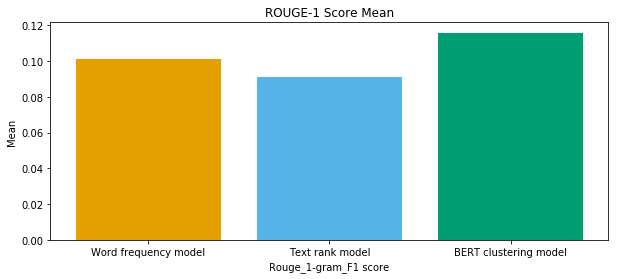

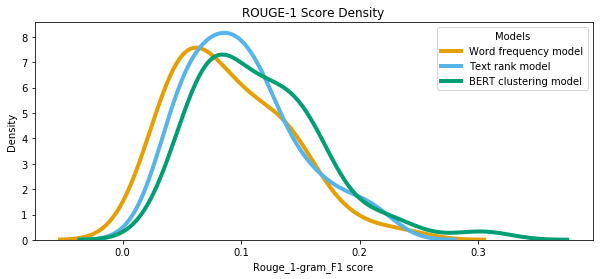

In [83]:
plt.figure(figsize=(10,4))

x = ['Word frequency model','Text rank model','BERT clustering model']
ROUGE1_mean = [0.10086302166961408, 0.09081258684152636, 0.11577391319962924]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, ROUGE1_mean, color=['#E69F00','#56B4E9','#009E73'])


plt.xlabel('Rouge_1-gram_F1 score')
plt.ylabel('Mean')
plt.title("ROUGE-1 Score Mean")

plt.xticks(x_pos, x)

plt.figure(figsize=(10,4))

sns.distplot(df['wf_rouge1_f1'], hist=False, kde=True, color = '#E69F00', 
             kde_kws={'linewidth': 4},label='Word frequency model')

sns.distplot(df['tr_rouge1_f1'], hist=False, kde=True,color = '#56B4E9',
             kde_kws={'linewidth': 4},label='Text rank model')

sns.distplot(df['bs_rouge1_f1'], hist=False, kde=True,color = '#009E73',
             kde_kws={'linewidth': 4},label='BERT clustering model')

plt.legend(prop={'size': 10}, title = 'Models')

plt.xlabel('Rouge_1-gram_F1 score')
plt.ylabel('Density')
plt.title("ROUGE-1 Score Density")


### It seems the clustering summary using BERT embedding is slightly better than word frequency and text rank model summary!

#### Future work could be considered to 
- 1) Try out different BERT layers to produce the latent vectors (word embedding)
- 2) Try different pooling strategy from word vector to sentence vectors
- 3) Some other clustering method

#### Use supervise learning to fine tune BERT model for summarization purpose could be another topic to develop
https://arxiv.org/pdf/1903.10318.pdf